# EDA

## Study of original datasets

### Dataset size

In [1]:
from pathlib import Path
import seaborn as sns

In [2]:
# Path
RAFDB_PATH = "../data/raw/RAF-DB"
KDEF_PATH = "../data/raw/KDEF/KDEF_and_AKDEF/KDEF"
AFFECTENET_PATH = "../data/raw/AffectNet/YOLO_format"

In [ ]:
def count_images_in_path(path):
    path = Path(path)
    extensions = {".png", ".jpg", ".jpeg"}

    return sum(
        1 for file in path.rglob("*")
        if file.is_file() and file.suffix.lower() in extensions
    )


In [10]:
nb_images_rafdb = count_images_in_path(RAFDB_PATH)
nb_images_kdef = count_images_in_path(KDEF_PATH)
nb_images_affectnet = count_images_in_path(AFFECTENET_PATH)

print(f"Nb images of RAFDB: {nb_images_rafdb}")
print(f"Nb images of KDEF: {nb_images_kdef}")
print(f"Nb images of Affectnet: {nb_images_affectnet}")

Nb images of RAFDB: 15339
Nb images of KDEF: 4900
Nb images of Affectnet: 25262


## Study of train val test

In [5]:
DATASET_PATH = Path("../data/aligned")
TRAIN_PATH = DATASET_PATH / "train"
VAL_PATH = DATASET_PATH / "val"
TEST_PATH = DATASET_PATH / "test"

In [12]:
nb_images_train = count_images_in_path(TRAIN_PATH)
nb_images_val = count_images_in_path(VAL_PATH)
nb_images_test = count_images_in_path(TEST_PATH)

print(f"Nb images of train: {nb_images_train}")
print(f"Nb images of val: {nb_images_val}")
print(f"Nb images of test: {nb_images_test}")

Nb images of train: 32283
Nb images of val: 4499
Nb images of test: 4512


### Image exploration

In [7]:
import random
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

EMOTION_LABELS = {
    0: "surprised",
    1: "fear",
    2: "disgust",
    3: "happy",
    4: "sad",
    5: "angry",
    6: "neutral",
}

def show_random_samples(root_path, n_samples=3):
    root_path = Path(root_path)
    image_exts = {".jpg", ".jpeg", ".png"}

    fig, axes = plt.subplots(
        len(EMOTION_LABELS), n_samples,
        figsize=(n_samples * 3, len(EMOTION_LABELS) * 3)
    )

    for row, (label_id, emotion) in enumerate(EMOTION_LABELS.items()):
        emotion_dir = root_path / str(label_id)

        images = [
            p for p in emotion_dir.iterdir()
            if p.is_file() and p.suffix.lower() in image_exts
        ]

        samples = random.sample(images, min(n_samples, len(images)))

        for col in range(n_samples):
            ax = axes[row, col]
            ax.axis("off")

            if col < len(samples):
                img = Image.open(samples[col])
                ax.imshow(img)
                if col == 0:
                    ax.set_title(emotion, fontsize=12)

    plt.tight_layout()
    plt.show()


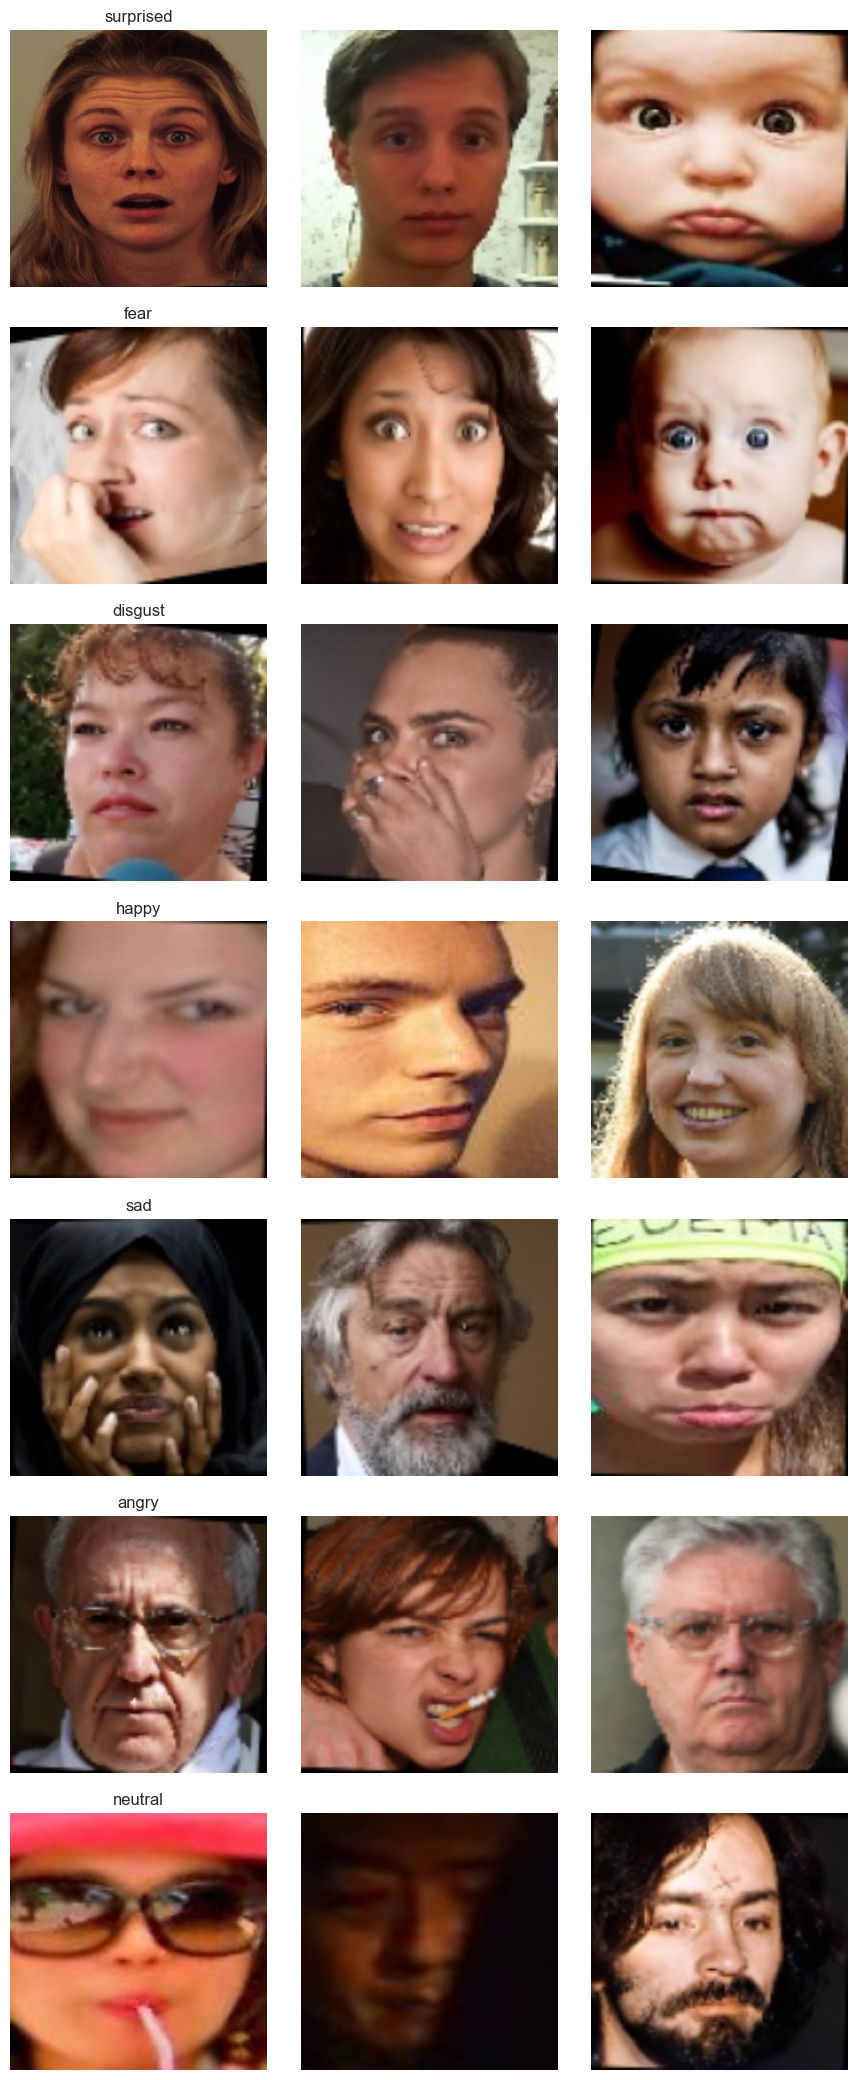

In [24]:
show_random_samples(TRAIN_PATH)

### Class imbalance


In [ ]:
IMAGE_EXTS = {".jpg", ".jpeg", ".png"}


def count_images_per_class(split_path):

    counts = {}

    for label in EMOTION_LABELS.keys():
        class_dir = split_path / str(label)
        if not class_dir.exists():
            counts[label] = 0
            continue

        counts[label] = sum(
            1 for p in class_dir.iterdir()
            if p.is_file() and p.suffix.lower() in IMAGE_EXTS
        )

    return counts


def plot_histogram(counts, title):
    
    labels = [EMOTION_LABELS[k] for k in counts.keys()]
    values = list(counts.values())
    sns.set_theme(style="whitegrid", font_scale=1.1)
    
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(x=labels, y=values,hue=labels, legend=False)
    
    plt.title(title, fontsize=14, fontweight='bold')
    plt.ylabel("Number of images")
    plt.xticks(rotation=30)
    
    plt.tight_layout()
    plt.show()

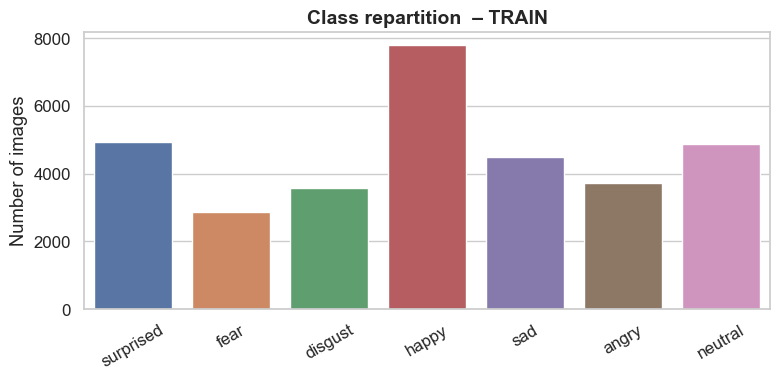

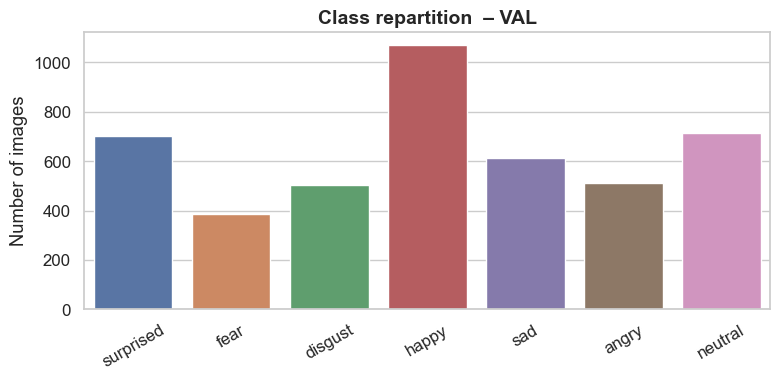

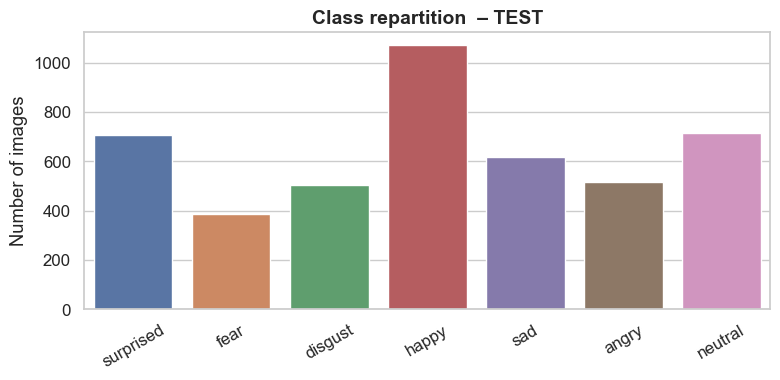

In [18]:
train_counts = count_images_per_class(TRAIN_PATH)
val_counts   = count_images_per_class(VAL_PATH)
test_counts  = count_images_per_class(TEST_PATH)

plot_histogram(train_counts, "Class repartition  – TRAIN")
plot_histogram(val_counts,   "Class repartition  – VAL")
plot_histogram(test_counts,  "Class repartition  – TEST")


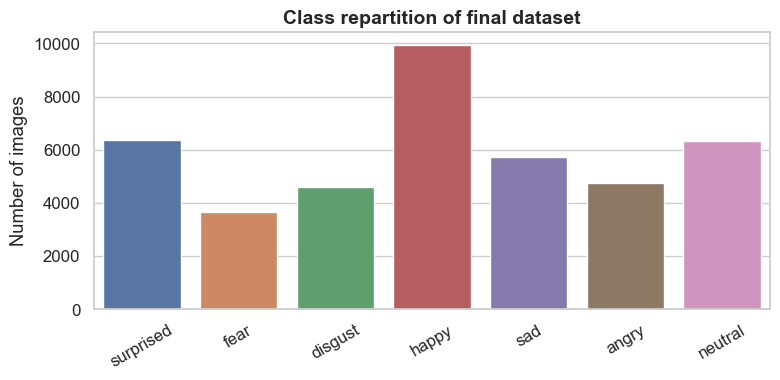

In [19]:
from collections import Counter

global_counts = Counter()

for split_path in [TRAIN_PATH, VAL_PATH, TEST_PATH]:
    global_counts.update(count_images_per_class(split_path))

plot_histogram(global_counts, "Class repartition of final dataset")
